# Dimensionality reducion on MNIST digit data

In [17]:
# %pip install python-mnist
%matplotlib inline

import time
import sys
import tensorflow as tf
from keras.datasets import mnist
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


In [18]:
# Load the data

(X_train,y_train),(X_test,y_test) = mnist.load_data()
print("Train data")
print(f"X Train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print("*"*100)
print("Test data")
print(f"X Test: {X_test.shape}")
print(f"Y Text: {y_test.shape}")


Train data
X Train: (60000, 28, 28)
y train: (60000,)
****************************************************************************************************
Test data
X Test: (10000, 28, 28)
Y Text: (10000,)


From the data above, we can already tell a few things
<li>The Train and test data has 60000 and 10000 images respectively</li>
<li>The images have a dimention of 28 by 28 pixels</li>

#### join the datasets

In [19]:
X_data = np.vstack((X_train, X_test))
print("X data: {} ".format(X_data.shape))

Y_data = np.hstack((y_train, y_test))
print("Y data: {} ".format(Y_data.shape))

X data: (70000, 28, 28) 
Y data: (70000,) 


In [20]:
print(type(Y_data))

<class 'numpy.ndarray'>


We have numpy arrays of X_data and Y_data

### Plotting the images

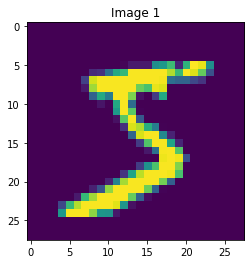

In [21]:
# Plot the first image on the data without alteing the colour

fig = plt.figure(figsize=(4,4))

plt.title("Image 1")
plt.imshow(X_data[0])
plt.show()

# display(X_train)

The above images show that the digit images are in <strong>RGB colour channels</strong> and we need to turn them into grayscale
<br>


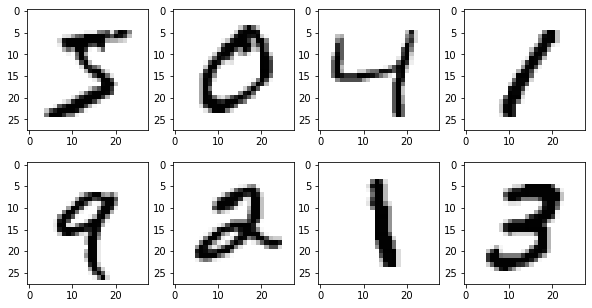

In [22]:
#  We can go further to plot the first few images
fig = plt.figure(figsize = (10,8))

for imgs in range(8):
    fig.add_subplot(340 + 1 + imgs)
    plt.imshow(X_data[imgs], cmap=plt.cm.binary) # we show the digits in a binary colour
    plt.tight_layout
plt.show()

In [10]:
# Lets see how the colour digits are distributed on the first image on the data.
for i in X_data[1]:
    print(i.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 159, 253, 159, 50, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 238, 252, 252, 252, 237, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54, 227, 253, 252, 239, 233, 252, 57, 6, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 60, 224, 252, 253, 252, 202, 84, 252, 253, 122, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 163, 252, 252, 252, 253, 252, 252, 96, 189, 253, 167, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 238, 253, 253, 190, 114, 253, 228, 47, 79, 255, 168, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 238, 252, 252, 179, 12, 

We can clearly seee that this is number 0

### Reashaping

Since we are interesed in dimentionality reduction, <br>we will need to reshape the data arrays into a <strong>single colour channel</strong>

In [23]:
# Reshape the X_train and X_test

display(X_data.shape)
X_data = X_data.reshape((X_data.shape[0], 28,28,-1))


print(f"After reshaping, X_data dim: {X_data.shape}")

(70000, 28, 28)

After reshaping, X_data dim: (70000, 28, 28, 1)


#### Transforming the data into High dimention
<li>Part 1: Use the 10 categories and see the result</li>
<li>Part 2: Use the 784 fratures <strong>28 X 28 </strong> and see the result</li>

### Part 1: Using the 10 categorical digits

In [24]:
# One hot encodding and representation
lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)
    
print('*'*100)


label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
****************************************************************************************************


<ipython-input-24-d9ac401d42f1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot = (lr==label).astype(np.int)


In [31]:
# Onehot encodding
encodded_data = pd.get_dummies(Y_data)
print(encodded_data)

       0  1  2  3  4  5  6  7  8  9
0      0  0  0  0  0  1  0  0  0  0
1      1  0  0  0  0  0  0  0  0  0
2      0  0  0  0  1  0  0  0  0  0
3      0  1  0  0  0  0  0  0  0  0
4      0  0  0  0  0  0  0  0  0  1
...   .. .. .. .. .. .. .. .. .. ..
69995  0  0  1  0  0  0  0  0  0  0
69996  0  0  0  1  0  0  0  0  0  0
69997  0  0  0  0  1  0  0  0  0  0
69998  0  0  0  0  0  1  0  0  0  0
69999  0  0  0  0  0  0  1  0  0  0

[70000 rows x 10 columns]


From the results above we can see that the encoded data shape after one hot encoding we get 10 categories. <br>
This is because the digits range from 0 -9 which are 10 10 categories

In [12]:
print(Y_data)
print('-'*20)
print(len(Y_data))

[5 0 4 ... 4 5 6]
--------------------
70000


In [14]:
# converting the y_data numpy array to a pandas dataframe with column label

Y_df = pd.DataFrame(Y_data, columns=['labels'])
Y_df

,labels
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


## Visualizaton using t-SNE

T-Dristribted Stochastic Neighbour Embedding (t-SNE) is a non linear dimentionality reduction techique that well suits vizualization of high dimension data especially on a 2D plot using conditional probalbility.<br>
t-SNE uses Gausian distribution

#### Converng data into a pandas dataframe for easier handling

In [33]:
# converting the one hot encoded data into a data frame and the concating labels 

enc_df = pd.DataFrame(encodded_data)
train_df = pd.concat([enc_df, Y_df], axis=1)
train_df.head()

# print('-'*100)
# display(train_df.value_counts())

,0,1,2,3,4,5,6,7,8,9,labels
0,0,0,0,0,0,1,0,0,0,0,5
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,4
3,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,9


In [42]:
# Function to compute t-SNE 

# def tSNE(dataframe):
start_time = time.time()
tsne = TSNE(n_components = 2, verbose=0, learning_rate=200, n_iter=500)
tsne_result = tsne.fit_transform(X=enc_df)
end_time = time.time()
print("Learning completed in {} seconds".format(end_time - start_time))

    # return tsne_result


Learning completed in 632.3714070320129 seconds


In [43]:
tsne_df1 = pd.DataFrame({"t-SNE 1":tsne_result[:,0], "t-SNE 2":tsne_result[:,1], "label":Y_df['labels']})
tsne_df1.head()

,t-SNE 1,t-SNE 2,label
0,-9.172859,1.264048,5
1,-7.536743,-5.641099,0
2,-3.430624,6.182778,4
3,-2.967699,0.595663,1
4,9.395224,2.521356,9


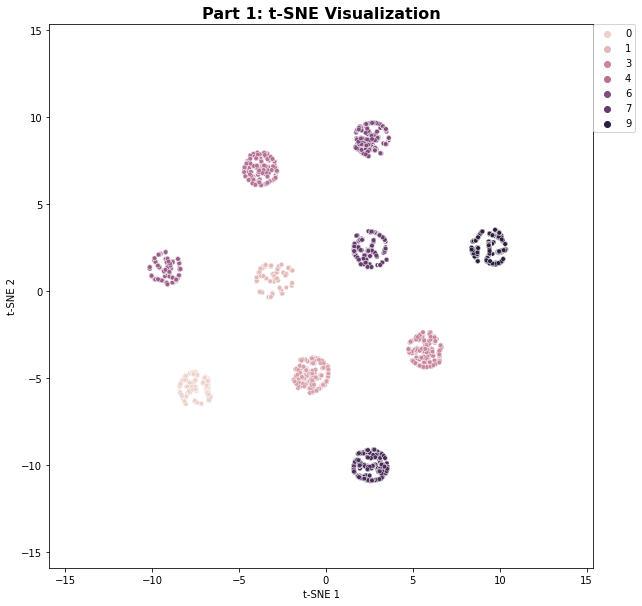

In [47]:
# Plotting the tsne data

fig, ax = plt.subplots(1, figsize=(15,10))
sns.scatterplot(x = 't-SNE 1', y= 't-SNE 2', hue = 'label', data = tsne_df1, ax = ax, s=20)
sns.color_palette("hls", 10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('Part 1: t-SNE Visualization', fontsize = 16, weight = 'bold')
ax.legend(bbox_to_anchor = (1,1), loc =2, borderaxespad = 0.0)

### Part 2: Use the 784 features

In [ ]:
X,y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)
X = X/255.0

In [ ]:
print(X.shape)
print('='*50)
print(y.shape)

print(type(X))

In [ ]:
cols = [str(col) for col in range(X.shape[1])]

df = pd.DataFrame(X, columns = cols)
# print(type(df))
# # df = pd.concat(y,df)
# df['y'] = y
# df.drop(['y'], axis = 1)

df.shape

In [ ]:
display(df.head)
print('='*150)
display(df.isnull().sum())

In [ ]:
# cols = [str(i for i in range(784))]

# df[cols] = df[cols].astype('object')
# df[cols].fillna(0.0)
df.head()

In [ ]:
df = df.replace(np.NaN, 0)

In [ ]:
df.head()

In [ ]:

start_time = time.time()
tsne = TSNE(n_components = 2, verbose=1, learning_rate=200, n_iter=500)
tsne_result2 = tsne.fit_transform(df)
end_time = time.time()
print("Learning completed in {} seconds".format(end_time - start_time))

In [ ]:
display(tsne_result)

In [ ]:
tsne_df2 = pd.DataFrame({"t-SNE 1":tsne_result2[:,0], "t-SNE 2":tsne_result2[:,1], "label":df['y']})
fig, ax = plt.subplots(1, figsize=(15,10))
sns.scatterplot(x = 't-SNE 1', y= 't-SNE 2', hue = 'label', data = tsne_df2, ax = ax, s=20)
lim = (tsne_result2.min()-5, tsne_result2.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('Part 2: t-SNE Visualization with 784 features', fontsize = 16, weight = 'bold')
ax.legend(bbox_to_anchor = (1,1), loc =2, borderaxespad = 0.0)

In [ ]:
# Since we will no longer need Mnist data, we can uninstall the package
%pip uninstall mnist
print("Successfully removed mnist")